In [28]:
import numpy as np
import matplotlib.pyplot as plt
h_eV = 4.135667696e-15 #Planck's constant eV*s
Hz_to_GeV = 4.136e-24

freqs = np.array([5, 6, 6.5, 7, 7.5, 8])*1e9
ff = np.array([0.05, 0.08, 0.11, 0.14,0.18, 0.22]) #form factor, assuming randomly polarized DP

# Relevant mass ranges

In [29]:
def mass_ueV_to_freq_GHz(mass_ueV):
    ''' turns axion mass to photon frequency '''
    return mass_ueV/h_eV*1e-15

def freq_to_mass(compton_f):
    ''' turns photon frequency into axion mass in units of eV '''
    return h_eV*compton_f
 
ma = freq_to_mass(freqs)*1e-9 #mass of dark photons in GeV
print('Dark photon masses: {} ueV'.format(ma*1e15))



Dark photon masses: [20.67833848 24.81400618 26.88184002 28.94967387 31.01750772 33.08534157] ueV


# Guess FFT bin width

In [30]:
Q_dm = 1e6 #
df_dm = np.mean(freqs)/Q_dm #bandwidth of dark matter halo at the center of the tuning range
b = df_dm/6 #dm bandwidth should be covered by 6 FFT bins.
b_GeV = b*Hz_to_GeV

# DPDM sensitivity

[2.06783385e-05 2.48140062e-05 2.68818400e-05 2.89496739e-05
 3.10175077e-05 3.30853416e-05]
[4.27074491e-15 3.08214465e-15 2.52534441e-15 2.15705192e-15
 1.83783599e-15 1.60959755e-15]


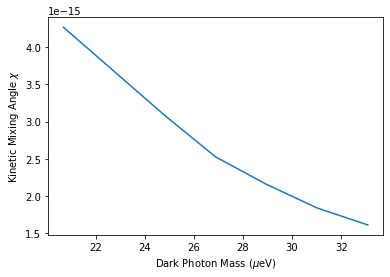

In [39]:
beta = 1 #cavity coupling coefficient
Lf = 1 # signal attenuation factor from data analysis
Vp = 16.8282 #cm^3
Veff = Vp*ff #cm^3 #cavity volume times form factor
rho = 0.45 #GeV/cm^3 local dark matter density
#dt = 1.31e29 # 1/GeV 1 day
dt = 1.5e26 # 1/GeV 100s integration time
Q = 1e6 # quality factor. For now, min(DM halo Q, cavity loaded Q)
SNR = 3
Tn = 4.3e-15 #GeV #50 mK

chi_unpolarized = np.sqrt((SNR*(beta+1)*b_GeV*Tn)/(beta*ma*rho*Veff*Q*Lf))*(b_GeV*dt)**(-1/4)
chi_polarized = chi_unpolarized / np.sqrt(0.0025)*np.sqrt(1/3)
print(ma*1e9)
print(chi_unpolarized)
plt.plot(ma*1e15, chi_unpolarized)
plt.xlabel(r'Dark Photon Mass ($\mu$eV)')
plt.ylabel(r'Kinetic Mixing Angle $\chi$')
plt.show()

# How long would it take to scan?

In [35]:
Q_cav = 1e6 #not sure
delta_f = np.mean(freqs)/Q_cav # cavity bandwidth
Delta_f = 3e9 #3 GHz # total search bandwidth
total_time_days = Delta_f/delta_f*100*1.157e-5 #100 s per step
print('{} days to scan the entire frequency range'.format(total_time_days))

520.65 days
